# Modele Support Vector Machines

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

svm_clf = Pipeline(
    [
        ('scaler', StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss='hinge'))
    ]
)

svm_clf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [3]:
print(f"Test acc: {svm_clf.score(X_test, y_test):.2f}")

Test acc: 1.00


/var/folders/53/b8z3c5xs0l51w2mzflnyk6400000gn/T/ipykernel_20467/3794771256.py:17: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(XX, YY, Z, color='k', levels=[-1,0,1], linestyles=['--','-','--'])


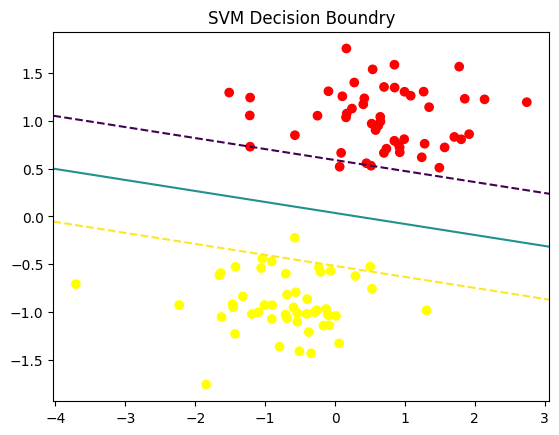

In [4]:
def plot_svm_pipeline(pipeline, X, y):
    scaler = pipeline.named_steps['scaler']
    svc = pipeline.named_steps['linear_svc']
    X_scaled = scaler.transform(X)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, color='k', levels=[-1,0,1], linestyles=['--','-','--'])

    plt.title("SVM Decision Boundry")
    plt.show()

plot_svm_pipeline(svm_clf, X, y)

## Kernel trick

Dla prawdziwych danych trudno oczekiwać aby były one liniowo separowalne. 

Dlatego jednym z rozwiązań jest stworzenie odwzorowania do wyżej wymiarowej przestrzeni tak by dane w niej były już liniowo separowalne. Obliczenie takiej transformacji dla dowolnych danych jest bardzo trudne, dlatego możemy zastosować tzw kernel trick. Potrzebujemy tylko obliczyć iloczyn skalarny:
$$ K(x,x') = <\phi(x), \phi(x')>$$
bez jawnego wyznaczania $\phi$.


- x, x' wektory wejściowe z oryginalnej przestrzeni
- $\phi(x)$ odwzorowanie do przestrzeni o wyższym wymiarze
- $K(x, x')$ funkcja jądrowa - kernel function - oblicza iloczy skalarny w zadanej przestrzeni.

1. Linear - $K(x, x') = x^{T}x'$
2. Polynomial - $K(x,x') = (x^{T}x' +c)^d$
3. RBF - $K(x,x') = exp(-\gamma \, |x-x'|^2)$



In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X,y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=44)

poly_svm_clf = Pipeline([
    ('polu_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss='hinge'))
])

poly_svm_clf.fit(X_train, y_train)

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('polu_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [6]:
print(f"Test acc: {poly_svm_clf.score(X_test, y_test):.2f}")

Test acc: 0.88


In [7]:
classical_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in classical_kernels:
    classical_svc = SVC(kernel=kernel, decision_function_shape='ovr', degree=3)
    classical_svc.fit(X_train, y_train)
    classical_score = classical_svc.score(X_test, y_test)

    print(f"{kernel} kernel classfication test score: {classical_score:.2f}")

linear kernel classfication test score: 0.83
poly kernel classfication test score: 0.87
rbf kernel classfication test score: 0.97
sigmoid kernel classfication test score: 0.70


In [8]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

In [9]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [10]:
def plot_decision_boundry(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min(), X[:, 0].max()+1
    y_min, y_max = X[:, 1].min(), X[:, 1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

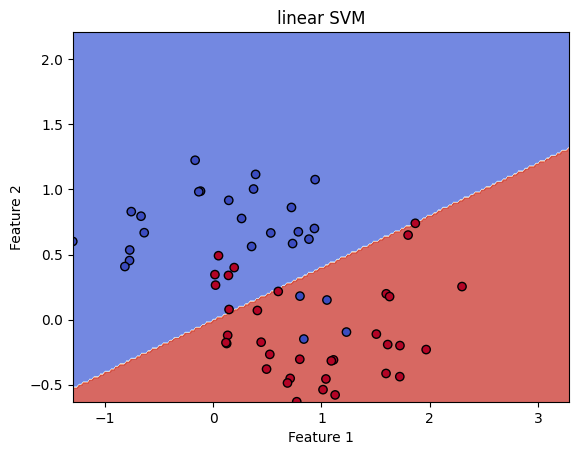

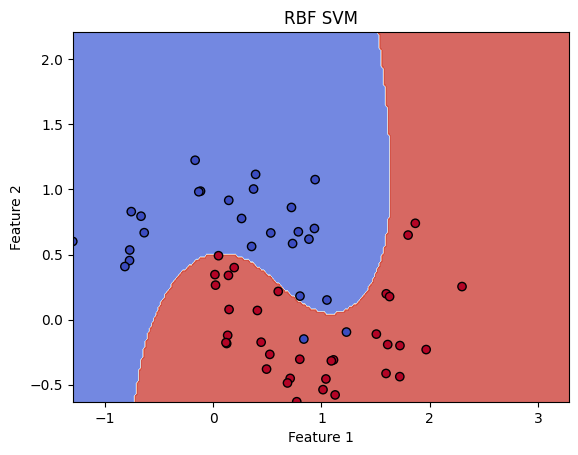

In [11]:
plot_decision_boundry(linear_svm, X_test, y_test, "linear SVM")
plot_decision_boundry(rbf_svm, X_test, y_test, "RBF SVM")

## Idea swap testu

Swap test służy do obliczania wartości

$$ |\langle \psi |\phi \rangle |^2 $$

czyli kwadratu modułu iloczynu skalarnego dwóch stanów kwantowych $|\psi \rangle$ i $|\phi \rangle$ .


### 🔧  Obwód swap testu

Swap test używa dodatkowego kubitu kontrolnego oraz bramki SWAP

Kontrolny kubit realizowany jest w stanie $|0\rangle$.

$$ \ket{\psi_0} = \ket{0} \otimes \ket{\psi} \otimes \ket{\phi} $$

### 🎛️  Jak to działa

- Zastosuj Hadamarda (zamiana bazy) na kontrolny (ancilla) kubit 
$$ \ket{\psi_1} = (\ket{0} + \ket{1}) \otimes \ket{\psi} \otimes \ket{\phi} $$
- Zastosuj CSWAP (3 kubitowa bramka - controll = ancilla)
- Zastosuj Hadamarda (powrót do bazy)
- Pomiar ancilla kubitu.


Prawdopodobieństwo, że kontrolny kubit da wynik $0$, wynosi:
$$P(0)=\frac{1+|\langle \psi |\phi \rangle |^2}{2}$$

Prawdopodobieństwo, że kontrolny kubit da wynik 1, wynosi:
$$P(1)=\frac{1-|\langle \psi |\phi \rangle |^2}{2}$$

Dzięki temu, mierząc kontrolny kubit, możemy wyznaczyć overlap między stanami.


In [12]:
import pennylane as qml
import pennylane.numpy as np

dev_test = qml.device('default.qubit', wires=['ancilla','phi','psi'], shots=5000)

@qml.qnode(dev_test)
def swap_test():
    qml.Hadamard(wires='ancilla')
    
    qml.X(wires=['phi'])
    qml.Hadamard(wires=['psi'])

    qml.CSWAP(wires=['ancilla', 'phi', 'psi'])
    qml.Hadamard(wires='ancilla')
    return qml.sample(wires='ancilla')

res = swap_test()

print(f"P(0) = {np.mean(res==0)}, P(1) = {np.mean(res == 1)}")
print(f"{2*np.mean(res==0) - 1}")

P(0) = 0.7506, P(1) = 0.2494
0.5012000000000001


/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


In [13]:

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def phi():
    qml.X(wires=0)
    return qml.state()

@qml.qnode(dev)
def psi():
    qml.Hadamard(wires=0)
    return qml.state()

def theory(phi, psi):
    inner = np.vdot(phi, psi)
    return float(np.abs(inner)**2)

In [14]:
theory(psi(), phi())

0.4999999999999999

## Quantum Embedding

Kwantowy Embedding reprezentuje klasyczne dane jako stan (wektor) w przestrzeni Hilberta. 
Odwzorowanie, które generuje embedding nazywamy quantum feature map. 

Feature map: $\phi: X \to F$ gdzie $F$ to nowa przestrzeń Hilberta stanów.
$$ x \to \ket{\phi(x)} $$

W naszym przypadku to odwzorowanie realizują $U_{\phi}(x)$ macierze kodowania kątowego. 
$$ \ket{0} \to U_{\phi}(x)\ket{0} $$

In [37]:
X[:5], y[:5]

(array([[-1.10689665e+00,  4.22928095e-02],
        [ 9.56799641e-01,  4.56750492e-01],
        [ 7.33516277e-01,  5.84617437e-01],
        [ 1.11140659e+00, -3.09213987e-01],
        [ 2.09081764e-01,  6.56679495e-04]]),
 array([0, 0, 0, 1, 1]))

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, np.pi))
X_scaled = scaler.fit_transform(X)

y_scaled = 2 * y -1 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [38]:
X_train[:5], y_train[:5]

(tensor([[1.89947175, 1.87042604],
         [1.3509262 , 1.17853671],
         [1.99374881, 1.98367299],
         [2.61730918, 0.87705533],
         [1.34724759, 1.9366214 ]], requires_grad=False),
 tensor([-1,  1, -1,  1, -1], requires_grad=False))

In [18]:
n_qubits = len(X_train[0])
n_qubits

2

Rozważmy model kwantowy w postaci: 
$$ 
f(x) = \braket{\phi(x) | M | \phi{x} } 
$$ 

Model może być realizowany jako _wariacyjny obwód kwantowy_.

Zamiast jednak trenować parametry dla takiego obwodu możemy wykorzystać kwantowy kernel który realizuje się przez SWAP test. 

Zamiast SWAP testu możemy wykorzystać inny obwód [Szczegóły tutaj](https://pennylane.ai/qml/demos/tutorial_kernel_based_training)

In [19]:
from pennylane.templates import AngleEmbedding

dev_kernel = qml.device('lightning.qubit', wires= n_qubits)

projector = np.zeros((2 ** n_qubits, 2 ** n_qubits))
projector[0, 0] = 1

In [20]:
@qml.qnode(dev_kernel)
def kernel(x1, x2):
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

In [21]:
X_train = np.array(X_train, requires_grad=False)
X_test = np.array(X_test, requires_grad=False)

y_train = np.array(y_train, requires_grad=False)
y_test = np.array(y_test, requires_grad=False)

In [22]:
kernel(X_train[0], X_train[0]), kernel(X_test[0], X_test[1])

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/preprocess.py:283: UserWarning: Differentiating with respect to the input parameters of Hermitian is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(


(array(1.), array(0.95997686))

In [23]:
def kernel_matrix(A, B):
    return np.array([[kernel(a,b) for b in B] for a in A])

In [24]:
svm = SVC(kernel=kernel_matrix).fit(X_train, y_train)

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/preprocess.py:283: UserWarning: Differentiating with respect to the input parameters of Hermitian is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(


In [25]:
predictions = svm.predict(X_test)

In [26]:
print(f"model qsvm {accuracy_score(predictions, y_test):.4f}")

model qsvm 0.8600


In [27]:
svm.predict(X_test[:4]), y_test[:4]

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/preprocess.py:283: UserWarning: Differentiating with respect to the input parameters of Hermitian is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(


(array([-1, -1,  1,  1]), tensor([-1, -1,  1, -1], requires_grad=False))

In [28]:
@qml.qnode(dev_kernel)
def kernel2(x1, x2):
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.CNOT([0,1])
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    qml.CNOT([0,1])
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

def kernel_matrix2(A, B):
    return np.array([[kernel2(a, b) for b in B] for a in A])


In [29]:
svm2 = SVC(kernel=kernel_matrix2).fit(X_train, y_train)

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/preprocess.py:283: UserWarning: Differentiating with respect to the input parameters of Hermitian is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(


In [30]:
predictions2 = svm2.predict(X_test)

In [31]:
print(f"acc: {accuracy_score(predictions2, y_test):.4f}")

acc: 0.5000


In [32]:
def zz_feature_map(x, wires=[0,1]):
    for i in range(len(wires)):
        qml.Hadamard(wires=wires[i])

    for i in range(len(wires)):
        qml.RX(2 * x[i], wires=wires[i])

    theta = (np.pi - x[0])* (np.pi - x[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.RZ(2 * theta, wires=wires[1])
    qml.CNOT(wires=[wires[0], wires[1]])

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/drawer/draw.py:801: UserWarning: When the input to qml.draw is not a QNode, the level argument is ignored.
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


(<Figure size 800x300 with 1 Axes>, <Axes: >)

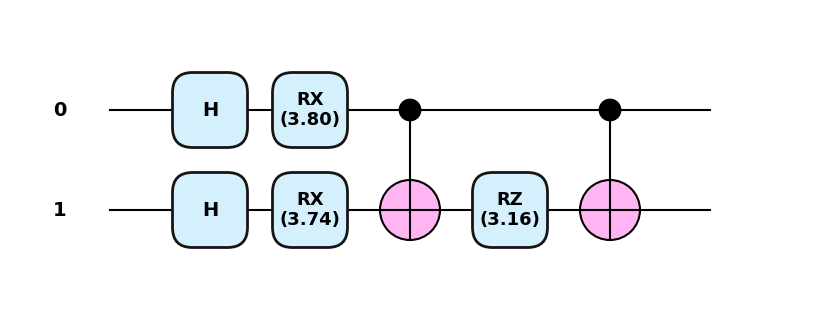

In [33]:
qml.draw_mpl(zz_feature_map, style="pennylane", decimals=2, level='device')(X_train[0])

In [34]:
dev = qml.device("lightning.qubit", wires=2)

@qml.qnode(dev, interface="numpy")
def kernel3(x1,x2):
    zz_feature_map(x1, wires=range(2))
    qml.adjoint(zz_feature_map)(x2, wires=range(2))
    return qml.expval(qml.Hermitian(projector, wires=range(2)))

def kernel_matrix3(A, B): 
    return np.array([[kernel3(a, b) for b in B] for a in A])

In [35]:
svm3 = SVC(kernel=kernel_matrix3).fit(X_train, y_train)

/Users/seba/Documents/GitHub/qml2025/venv/lib/python3.13/site-packages/pennylane/devices/preprocess.py:283: UserWarning: Differentiating with respect to the input parameters of Hermitian is not supported with the adjoint differentiation method. Gradients are computed only with regards to the trainable parameters of the circuit.

 Mark the parameters of the measured observables as non-trainable to silence this warning.
  warnings.warn(


In [36]:
predictions3 = svm3.predict(X_test)
print(f"acc: {accuracy_score(predictions3, y_test):.4f}")

acc: 0.7000


In [40]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pennylane.numpy as np 

In [44]:
def load_mnist(n_qubits):
    mnist = fetch_openml('mnist_784', version=1)
    X, y = mnist.data, mnist.target
    mask = (y == '3') | (y == '6')
    X_filter = X[mask]
    y_filter = y[mask]

    X_filter = X_filter[:300]
    y_filter = y_filter[:300]

    y_fiter = np.where(y_filter == '3', 0, 1)

    pca = PCA(n_components=n_qubits)
    X_reduced = pca.fit_transform(X_filter)
    scaler = StandardScaler().fit(X_reduced)
    X_scaled = scaler.transform(X_reduced)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_filter, test_size=0.2, random_state=44
    )
    return X_train, X_test, y_train, y_test

In [45]:
n_qubit = 6
X_train, X_test, y_train, y_test = load_mnist(n_qubits=n_qubits)

In [46]:
X_train.shape

(240, 2)

In [ ]:
def visualize(x, labels):
    import matplotlib.pyplot as plt 
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    label2name = {0: '3', 1: '6'}
    mnist_tsne = tsne.fit_transform(x)
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(mnist_tsne[indices, 0], mnist_tsne[indices, 1])
    plt.title("t-SNE for 3 and 6")
    plt.xlabel("t-SNE dim 1")
    plt.ylabel("t-SNE dim 2")
    plt.tight_layout()
    plt.show()

/var/folders/53/b8z3c5xs0l51w2mzflnyk6400000gn/T/ipykernel_20467/1255198376.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


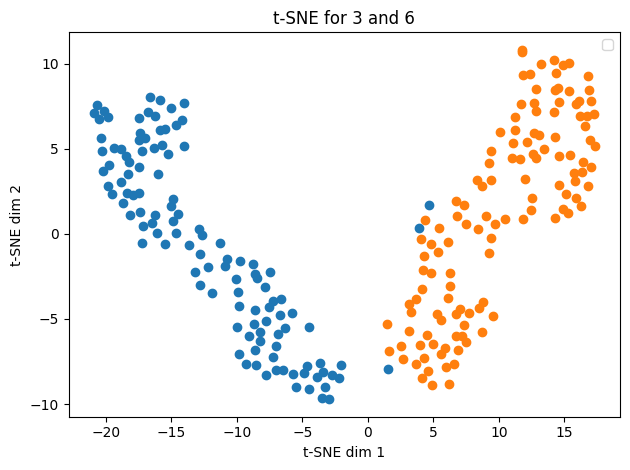

In [52]:
visualize(X_train, y_train)

In [53]:
dev = qml.device("lightning.qubit", wires=n_qubit)

@qml.qnode(dev)
def kernel_mnist(x1,x2, n_qubit):
    qml.AngleEmbedding(x1, wires=range(n_qubit))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubit))
    return qml.expval(qml.Projector([0]*n_qubit, wires=range(n_qubit)))

In [57]:
def kernel_mat(A, B):
    return np.array([[kernel_mnist(a, b, 6) for b in B] for a in A])

In [58]:
svm = SVC(kernel=kernel_mat)

In [59]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,<function ker...t 0x16b7ac0e0>
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [60]:
pred = svm.predict(X_test)
print(f"Acc: {accuracy_score(y_test, pred)}")

Acc: 0.9166666666666666
